ІНДИВІДУАЛЬНЕ ЗАВДАННЯ

Розв’язати задачу математичної фізики в декартовій системі координат методом поділу змінних.

Студенти, прізвища яких стоять у списку під номерами No 1–8, розв’язують рівняння з умовами, конкретні значення правих частин яких зазначені під номерами No 1–8 відповідно.

При цьому значення параметрів α , β ,γ ,δ з умовами No 1–8, треба вибрати з групи А. Інші студенти, прізвища яких стоять у списку під номерами No 9–16, No 17–24, No 25–32, розв’язують кожне рівняння знову з умовами No 1–8, але обирають значення параметрів у граничних умовах вже із груп Б, В та Г, відповідно.

Наприклад, студент, прізвище якого стоїть у списку групи під номером No 13, розв’язує задачі з умовами No 5, а значення параметрів у граничних умовах кожної задачі вибирає із групи Б.

В умовах усіх задач A,B = const > 0 та κ = const ≥ 0; всі параметри α, β,γ,δ можуть приймати тільки значення, рівні нулю або одиниці.

У кожному пункті з номерами No 1–8 задано конкретні значення всіх неоднорідних правих частин рівнянь та умов задач. Усі не вказані у пункті значення умов вважаються рівними нулю.

Задача. Розв'язання рівняння теплопровідності у прямокутнику:

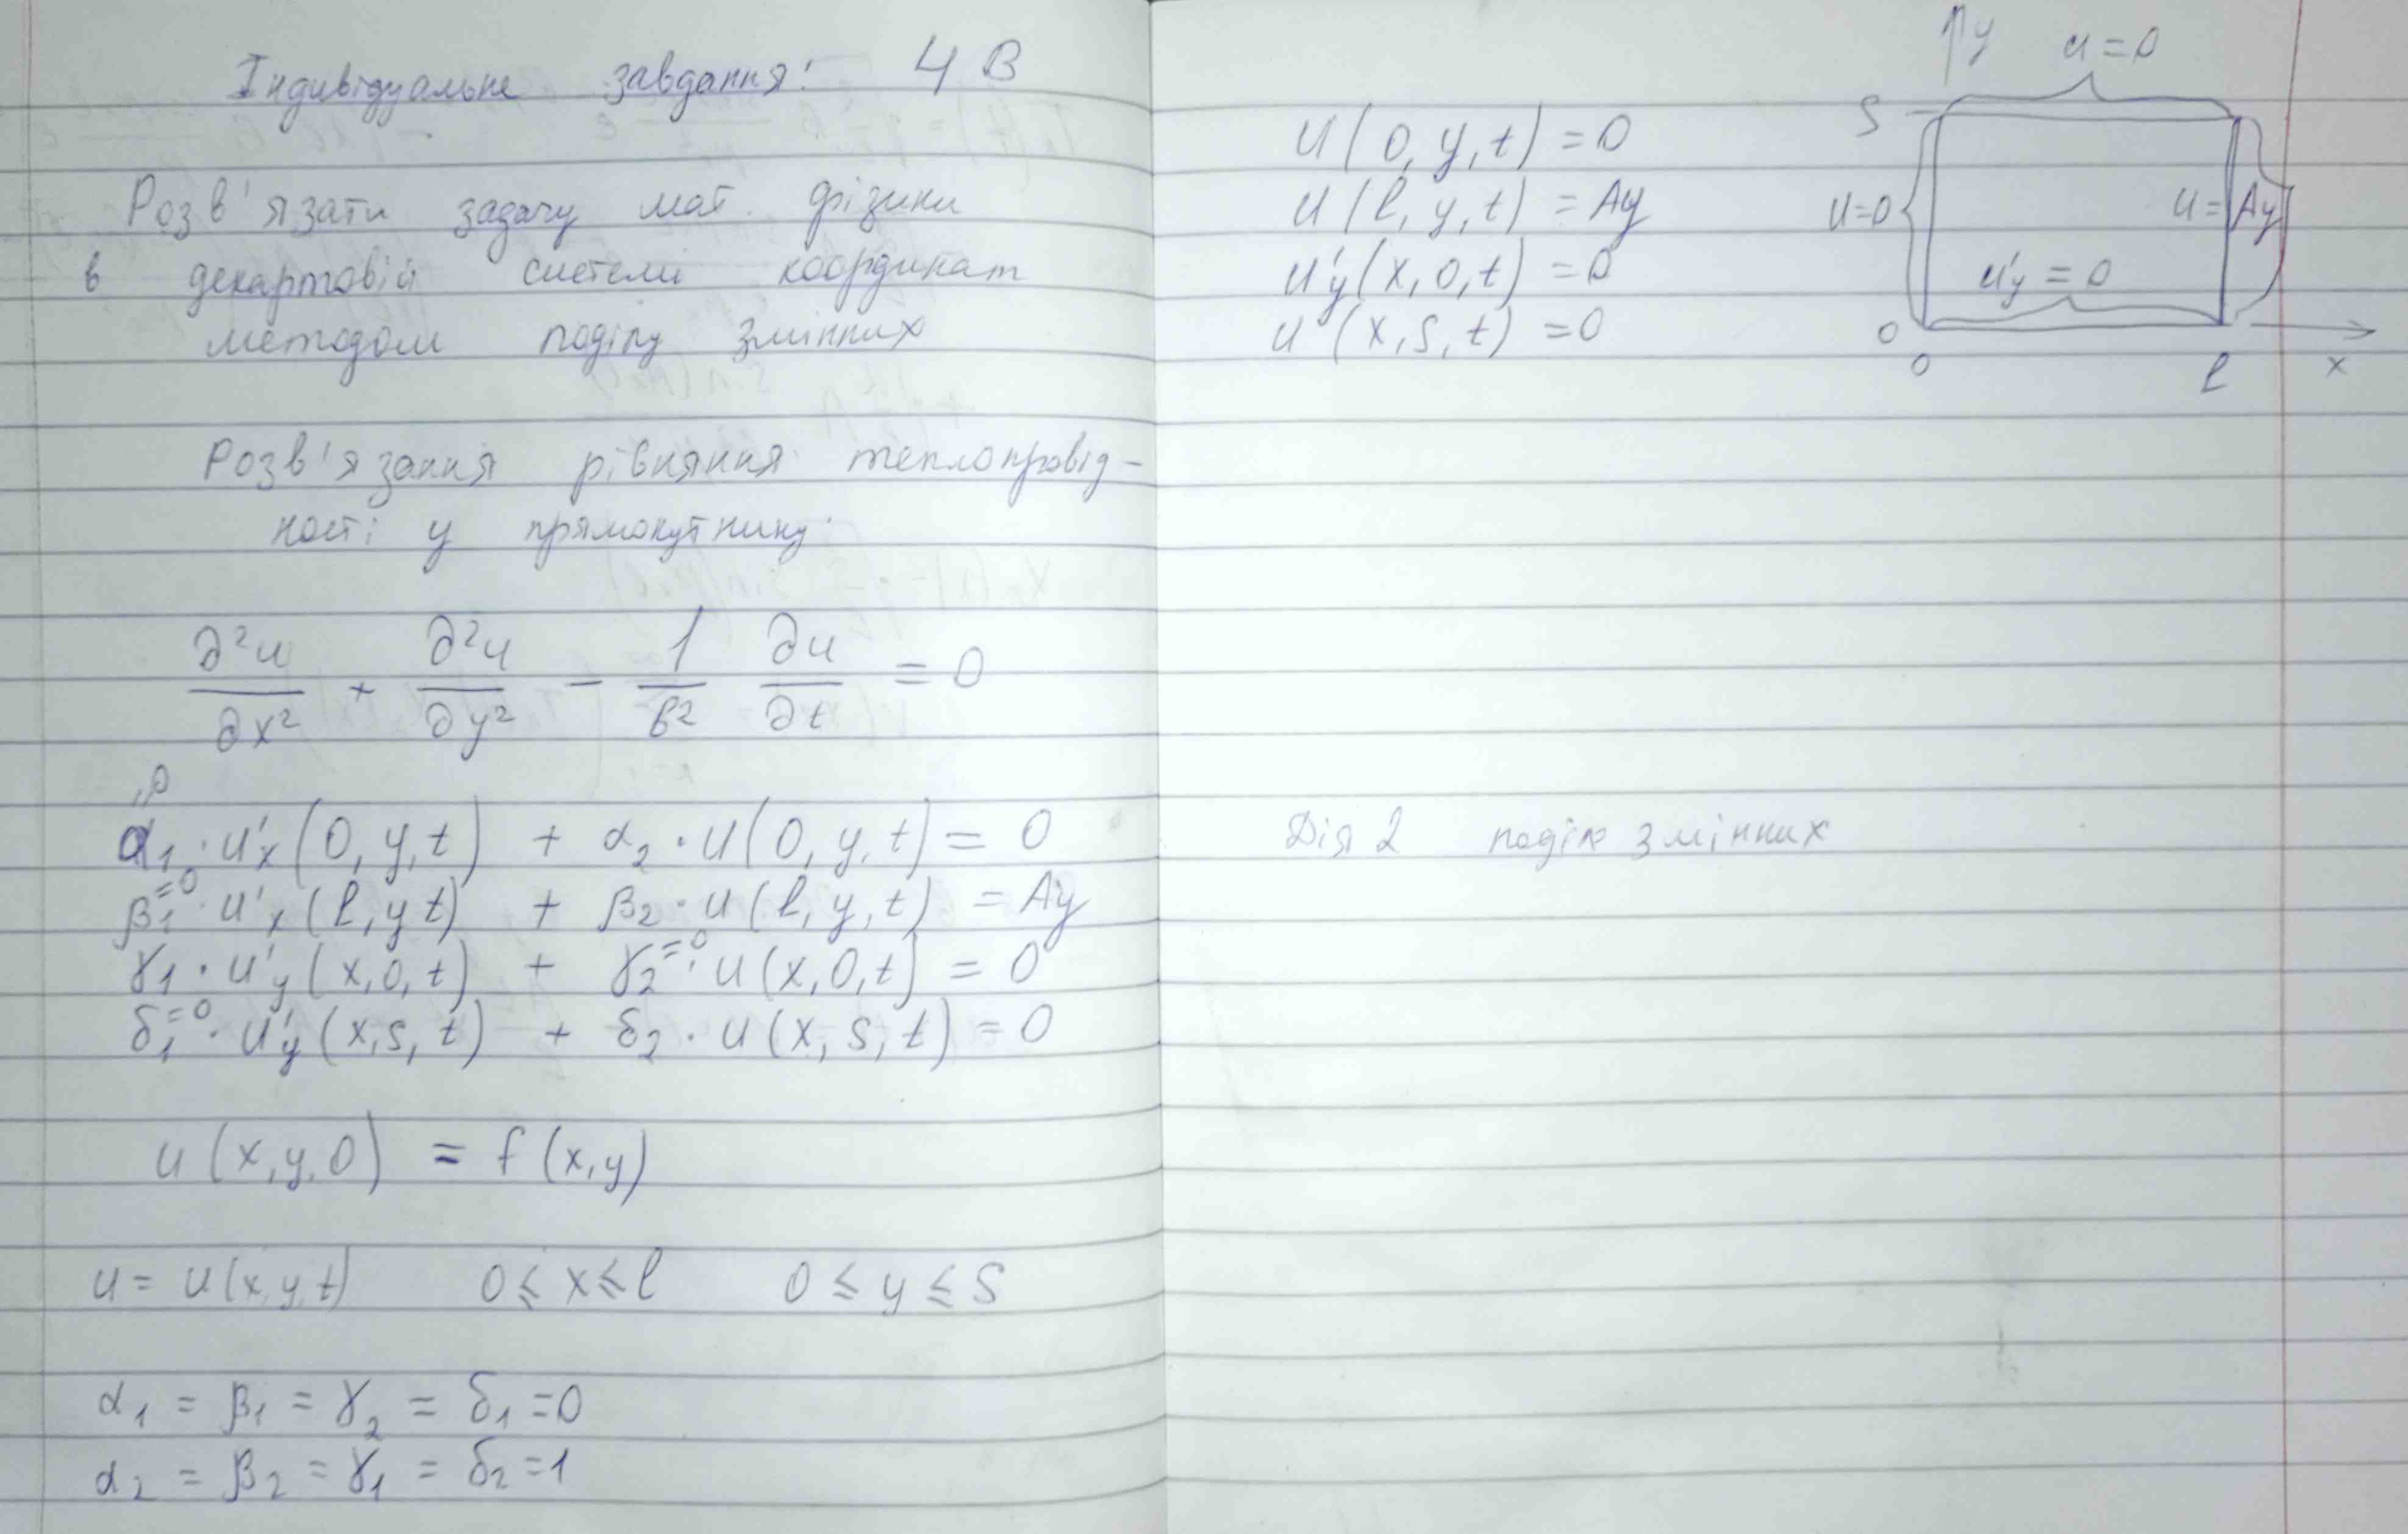

подберём подходящий ортонормированный базис

In [1]:
l,s = var("l,s")
x,y = var("x,y")

assume (s > 0)
assume (l > 0)

mu_x = lambda k : pi / (2*l) * (2*k+1)
mu_y = lambda k : pi / (2*s) * (2*k+1)

Xs = lambda x, k, l : (-1)^k*(sqrt(2/l)*sin(mu_x(k) * x))
Yc = lambda y, k, s : (sqrt(2/s)*cos(mu_y(k) * y))

mu_z = lambda k : pi / (l) * (k)
Zs = lambda z, k, l : sqrt(2/l)*sin(mu_z(k) * z)
Zc = lambda z, k, l : sqrt(2/l)*cos(mu_z(k) * z)

Исходя из заданных граничных условий в качестве ортонормированного базиса по оси $x$ целесообразно выбрать функцию

$X_k(x) = Xs(x, k, l) = (-1)^k\left(\sqrt{\frac{2}{l}}sin\left(\mu_x(k) \, x\right)\right)$


$\mu_x (k) = \frac{\pi}{2 l}\left(2 k+1\right)$

0
1
0
1
0
1
0
1
0
1


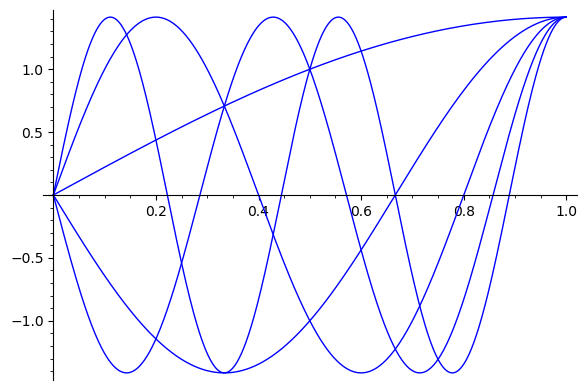

In [9]:
plt = Graphics()
for k in range(5):
    plt += plot(Xs(y, k, l).subs(l == 1), y, 0, 1)
    print(integrate(Xs(y, k, l) * Xs(y, k+1, l), y, 0, l))
    print(integrate(Xs(y, k, l) * Xs(y, k, l), y, 0, l))
plt.show()

в качестве ортонормированного базиса по оси $y$ целесообразно выбрать функцию

$Y_k(x) = Yc(y, k, s) = \sqrt{\frac{2}{s}}\,cos\left(\mu_y(k) y)\right)$


$\mu_y (k) = \frac{\pi}{2 s}\left(2 k+1\right)$

0
1
0
1
0
1
0
1
0
1


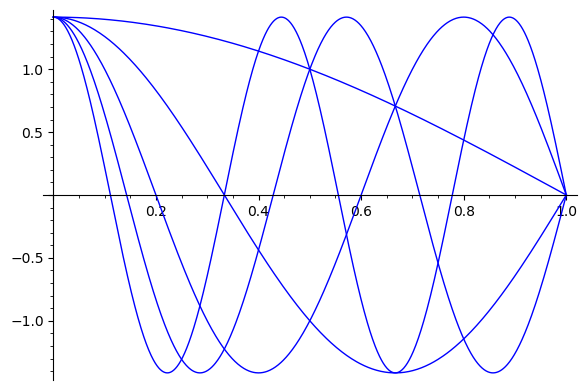

In [4]:
plt = Graphics()
for k in range(5):
    plt += plot(Yc(y, k, s).subs(s == 1), y, 0, 1)
    print(integrate(Yc(y, k, s) * Yc(y, k+1, s), y, 0, s))
    print(integrate(Yc(y, k, s) * Yc(y, k, s), y, 0, s))
plt.show()

0
1
0
1
0
1
0
1


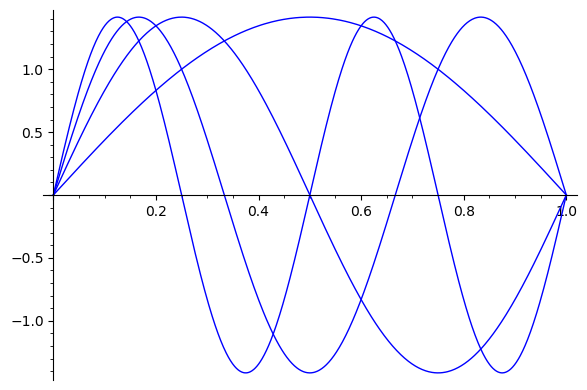

In [7]:
plt = Graphics()
for k in range(1,5):
    plt += plot(Zs(x, k, l).subs(l == 1), x, 0, 1)
    print(integrate(Zs(x, k, l) * Zs(x, k+1, l), x, 0, l))
    print(integrate(Zs(x, k, l) * Zs(x, k, l), x, 0, l))
plt.show()

1 0
1 1
2 0
2 1
3 0
3 1


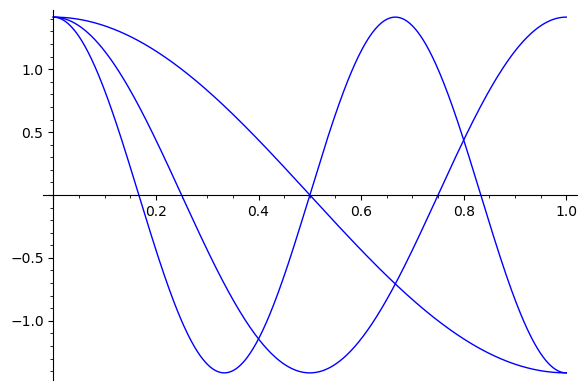

In [8]:
plt = Graphics()
for k in range(1,4):
    plt += plot(Zc(x, k, l).subs(l == 1), x, 0, 1)
    print(k, integrate(Zc(x, k, l) * Zc(x, k+1, l), x, 0, l))
    print(k, integrate(Zc(x, k, l) * Zc(x, k, l), x, 0, l))
plt.show()

Однако, очевидно, что граничные условия 

$u(l,y,t) = Ay$

в углах прямоугольника противоречат граничным условиям

$u(x,s,t) = 0$

а также граничным условиям

$u'_y(x,0,t) = 0$

чтобы уйти от этого противоречия я видоизменяю условие следующим образом

$u(l,y,t) = A(s-y)$

и буду далее решать задачу

$\frac{\partial^2 u}{\partial x^2} + \frac{\partial^2 u}{\partial y^2} - \frac{1}{b^2}\frac{\partial u}{\partial t} = 0$

со следующими непротиворечивыми в углах  граничными условиями

$u(0,y,t) = 0$

$u(l,y,t) = A(s-y)$

$u'_y(x,0,t) = 0$

$u(x,s,t) = 0$

Разделение переменных

$u(x,y,t) = X(x)\,Y(y)\,T(t)$

Подставляем в исходное дифференциальное уравнение

$\left(\frac{\partial^2}{\partial x^2} + \frac{\partial^2}{\partial y^2} - \frac{1}{b^2}\frac{\partial}{\partial t}\right)\,u(x,y,t) = 0$

$\left(\frac{\partial^2}{\partial x^2} + \frac{\partial^2}{\partial y^2} - \frac{1}{b^2}\frac{\partial}{\partial t}\right)\,X(x)\,Y(y)\,T(t) = 0$

$\frac{\partial^2}{\partial x^2}\,X(x)\,Y(y)\,T(t) + \frac{\partial^2}{\partial y^2}\,X(x)\,Y(y)\,T(t) - \frac{1}{b^2}\frac{\partial}{\partial t}\,X(x)\,Y(y)\,T(t) = 0$

$\frac{\partial^2 X(x)}{\partial x^2}\,Y(y)\,T(t) + \frac{\partial^2 Y(y)}{\partial y^2}\,X(x)\,T(t) - \frac{1}{b^2}\frac{\partial \,T(t)}{\partial t}\,X(x)\,Y(y) = 0$

$\frac{\partial^2 X(x)}{\partial x^2} + \frac{\partial^2 Y(y)}{\partial y^2}\frac{X(x)}{Y(y)} - \frac{1}{b^2}\frac{\partial \,T(t)}{\partial t}\frac{X(x)}{T(t)} = 0$

$\frac{\partial^2 X(x)}{\partial x^2} = \frac{1}{b^2}\frac{\partial \,T(t)}{\partial t}\frac{X(x)}{T(t)} -\frac{\partial^2 Y(y)}{\partial y^2}\frac{X(x)}{Y(y)}$

$\frac{\partial^2 X(x)}{\partial x^2} = \left(\frac{1}{b^2}\frac{\partial \,T(t)}{\partial t}\frac{1}{T(t)} -\frac{\partial^2 Y(y)}{\partial y^2}\frac{1}{Y(y)}\right) X(x)$

У гільбертовому просторі $L_2 \left( 0, l |1 \right)$ розв'яжемо крайову задачу для оператора Штурма-Ліувілля:

$\frac{d^2 X(x)}{d x^2} = \lambda \, X(x)$

Запишемо розв'язок (власні функції й власні значення)

$X_k(x) = (-1)^k\left(\sqrt{\frac{2}{l}}sin\left(\mu_x(k) \, x\right)\right)$

$\mu_x (k) = \frac{\pi}{2 l}\left(2 k+1\right), k = 0,1,2,..$

$\lambda = \lambda_k = - \mu_k^2$

У результаті розв'язання крайової задачі одержимо:

$\frac{d^2 X_k}{d x^2} = \lambda \, X_k = - \mu_k^2 \, X_k$

в) Оскільки кожний орт із базису $\{X_k\}_{k = 0}^{\infty}$ сам є розв'язком крайової задачі, то у використаній вище підстановці $u(x,y,t) = X(x)\,Y(y)\,T(t)$ кожному $X_k(x)$ буде відповідати своя функція $Y(y)\,T(t) ≡ Y_k(y)\,T_k(t)$ . Тому можливий розв'язок нашої задачі слід шукати у вигляді розкладання в ряд Фур'є:

$u(x,y,t) = \sum\limits_{k=0}^{\infty} X_k(x)\,Y_k(y)\,T_k(t)$

Вивід рівнянь для функції $Y_k(y)\,T_k(t)$

Підставляючи записане розкладання в рівняння, одержуємо

$\left(\frac{\partial^2}{\partial x^2} + \frac{\partial^2}{\partial y^2} - \frac{1}{b^2}\frac{\partial}{\partial t}\right)\,u(x,y,t) = 0$

$\left(\frac{\partial^2}{\partial x^2} + \frac{\partial^2}{\partial y^2} - \frac{1}{b^2}\frac{\partial}{\partial t}\right)\,\sum\limits_{k=0}^{\infty} X_k(x)\,Y_k(y)\,T_k(t) = 0$

$\sum\limits_{k=0}^{\infty} \left(\frac{\partial^2}{\partial x^2}\,X_k(x)\,Y_k(y)\,T_k(t) + \frac{\partial^2}{\partial y^2}\,X_k(x)\,Y_k(y)\,T_k(t) - \frac{1}{b^2}\frac{\partial}{\partial t}\,X_k(x)\,Y_k(y)\,T_k(t) \right) = 0$

$\sum\limits_{k=0}^{\infty} \left(\frac{d^2 X_k(x)}{d x^2}\,Y_k(y)\,T_k(t) + \frac{d^2 Y_k(y)}{d y^2}\,X_k(x)\,T_k(t) - \frac{1}{b^2}\frac{d T_k(t)}{d t}\,X_k(x)\,Y_k(y) \right) = 0$

Враховуючи, що $\frac{d^2 X_k}{d x^2} = - \mu_k^2 \, X_k$

$\sum\limits_{k=0}^{\infty} \left(- \mu_k^2 \, X_k\,Y_k(y)\,T_k(t) + \frac{d^2 Y_k(y)}{d y^2}\,X_k(x)\,T_k(t) - \frac{1}{b^2}\frac{d T_k(t)}{d t}\,X_k(x)\,Y_k(y) \right) = 0$

$\sum\limits_{k=0}^{\infty} \left(- \mu_k^2 \,Y_k(y)\,T_k(t) + \frac{d^2 Y_k(y)}{d y^2}\,T_k(t) - \frac{1}{b^2}\frac{d T_k(t)}{d t}\,Y_k(y) \right) \,X_k(x) = 0$

помножимо дане рівняння скалярно на $X_{k'}$ :

$\sum\limits_{k=0}^{\infty} \left(- \mu_k^2 \,Y_k(y)\,T_k(t) + \frac{d^2 Y_k(y)}{d y^2}\,T_k(t) - \frac{1}{b^2}\frac{d T_k(t)}{d t}\,Y_k(y) \right) \,
\left(X_k(x),X_{k'}(x) \right) = 0$

де в силу ортонормованості $\left(X_k(x),X_{k'}(x) \right) = \delta_{k,k'}$

$- \mu_k^2 \,Y_k(y)\,T_k(t) + \frac{d^2 Y_k(y)}{d y^2}\,T_k(t) - \frac{1}{b^2}\frac{d T_k(t)}{d t}\,Y_k(y) = 0$

$ \frac{d^2 Y_k(y)}{d y^2}\,T_k(t) - \mu_k^2 \,Y_k(y)\,T_k(t) - \frac{1}{b^2}\frac{d T_k(t)}{d t}\,Y_k(y) = 0$

$ \frac{d^2 Y_k(y)}{d y^2} - \mu_k^2 \,Y_k(y) - \frac{1}{b^2}\frac{1}{T_k(t)}\frac{d T_k(t)}{d t}\,Y_k(y) = 0$

$ \frac{d^2 Y_k(y)}{d y^2} - \left(\mu_k^2  - \frac{1}{b^2}\frac{1}{T_k(t)}\frac{d T_k(t)}{d t} \right) \,Y_k(y)= 0$

$ \frac{d^2 Y_k(y)}{d y^2} = \left(\mu_k^2  - \frac{1}{b^2}\frac{1}{T_k(t)}\frac{d T_k(t)}{d t} \right) \,Y_k(y)$

$\dots$